In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline

In [2]:
dataset = pd.read_csv('appdata10.csv')
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [3]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
dataset['hour'] = dataset['hour'].str.slice(1,3).astype(int)

In [7]:
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


<Figure size 432x288 with 0 Axes>

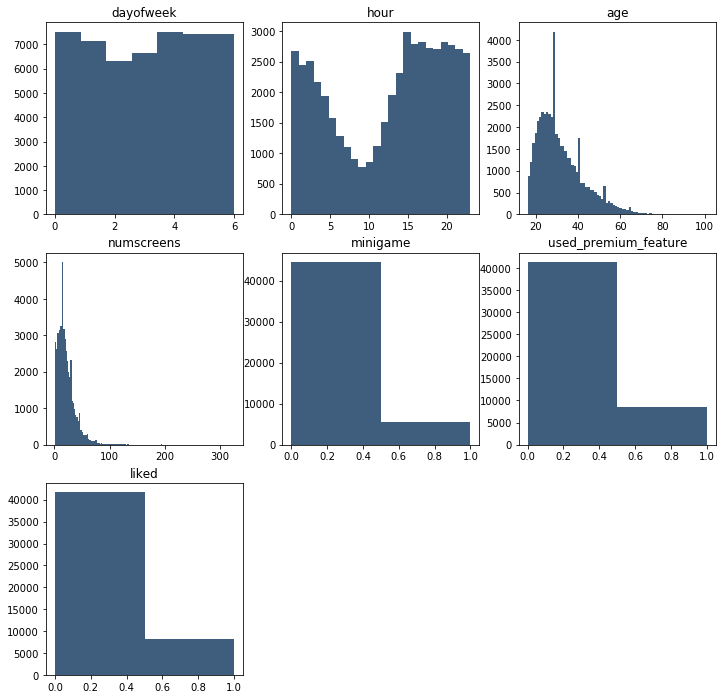

In [16]:
plt.suptitle('Histograms of Numerical Columns', fontsize = 20)
plt.figure(figsize=(12,12))

for i in range(1, dataset2.shape[1]+1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    
    f.set_title(dataset2.columns.values[i-1])
    #f.figure(figsize=(1,1))
    
    vals = np.size(dataset2.iloc[:,i-1].unique())
    
    plt.hist(dataset2.iloc[:, i-1], bins = vals, color='#3F5D7D')

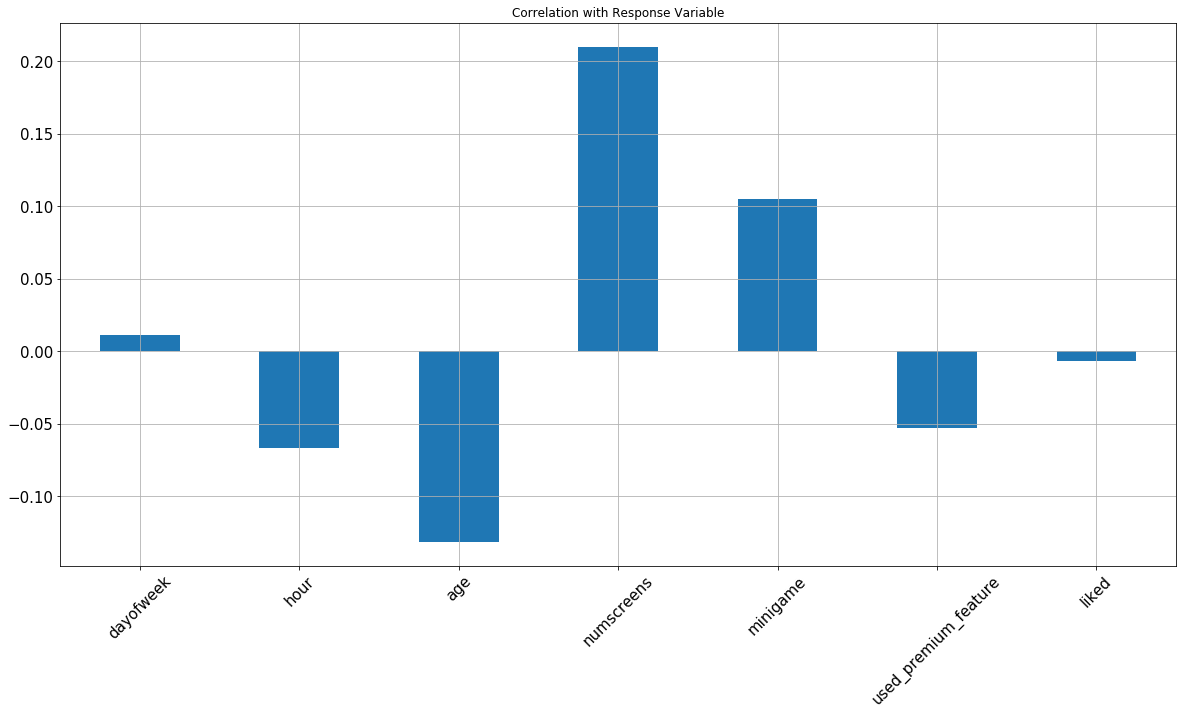

In [18]:
dataset2.corrwith(dataset['enrolled']).plot.bar(figsize= (20, 10), title = 'Correlation with Response Variable',
                                               fontsize = 15, rot = 45, grid = True)

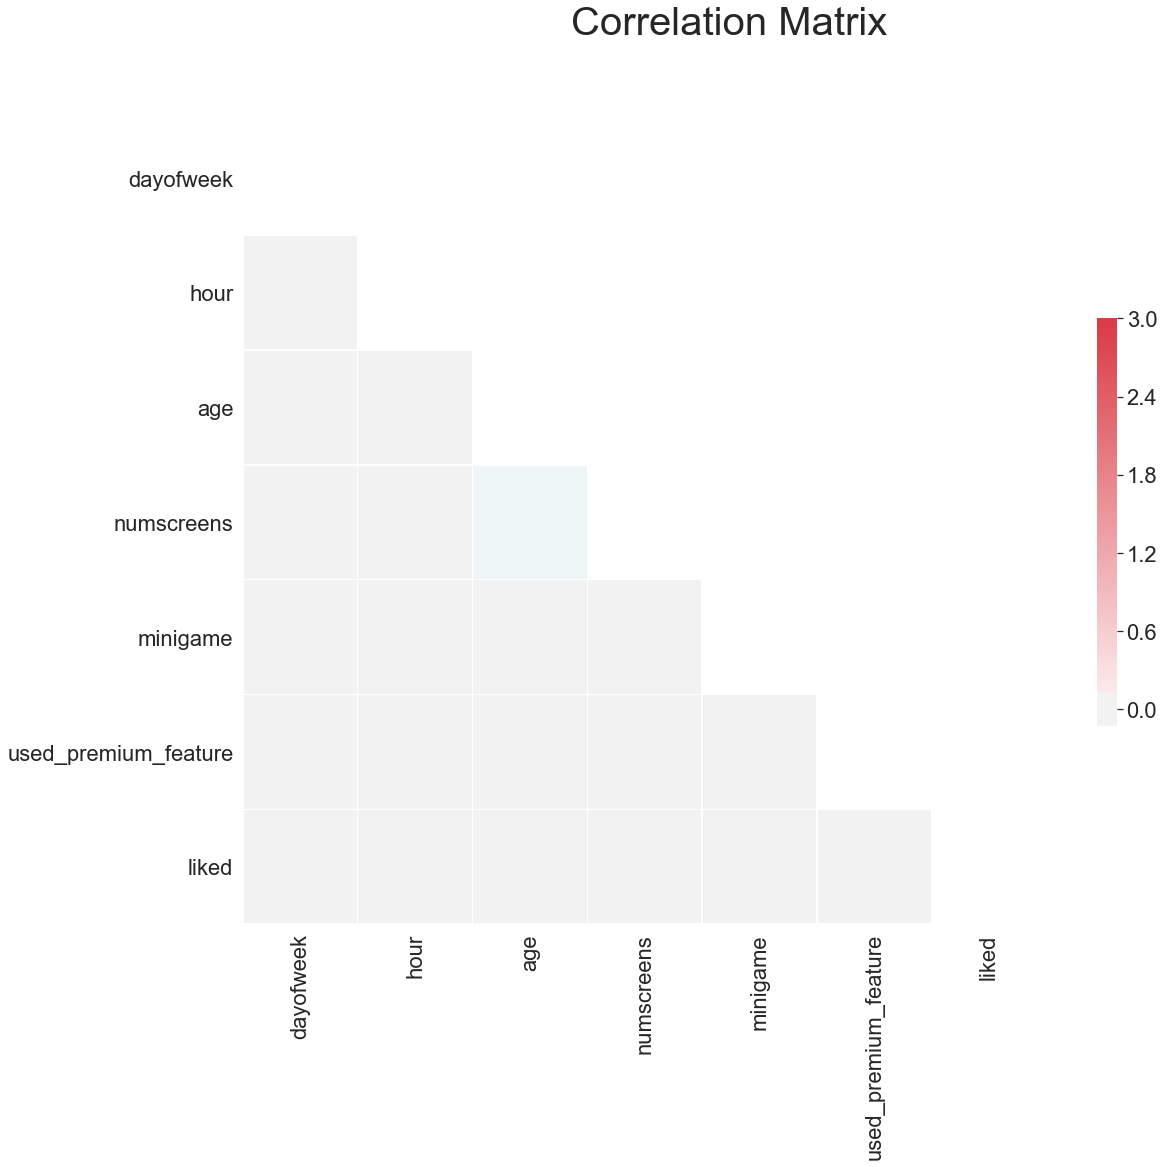

In [20]:
sns.set(style="white", font_scale=2)

corr = dataset2.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (18 ,15))
f.suptitle("Correlation Matrix", fontsize = 40)

cmap = sns.diverging_palette(220, 10, as_cmap= True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 3, center = 0, square = True, linewidths=.5, cbar_kws={"shrink": .5})


In [21]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [22]:
dataset["first_open"] = [parser.parse(row_data) for row_data in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset["enrolled_date"]]

In [23]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [24]:
dataset["difference"] = (dataset["enrolled_date"] - dataset["first_open"]).astype('timedelta64[h]')

Text(0.5,1,'Distribution of Time Since Enrolled')

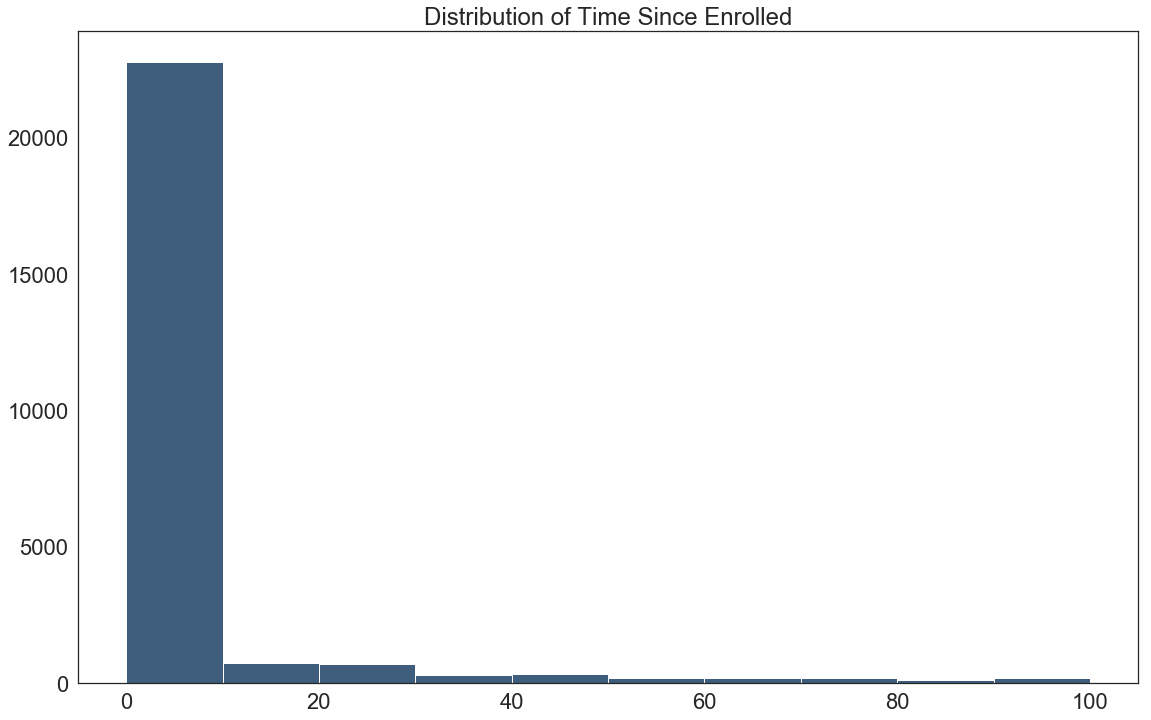

In [34]:
plt.figure(figsize=(19,12))
plt.hist(dataset['difference'].dropna(), color = '#3F5D7D', range =[0, 100])

plt.title('Distribution of Time Since Enrolled')

In [35]:
dataset.loc[dataset['difference'] > 48, "enrolled"] = 0

In [36]:
dataset = dataset.drop(columns = ['difference', 'enrolled_date', 'first_open'])

In [37]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values

In [38]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [39]:
dataset["screen_list"] = dataset["screen_list"].astype(str) + ','

In [40]:
for sc in top_screens:
    dataset[sc] = dataset['screen_list'].str.contains(sc).astype(int)
    dataset["screen_list"] = dataset['screen_list'].str.replace(sc+',', "")

In [41]:
dataset["Other"] = dataset['screen_list'].str.count(",")

In [42]:
dataset = dataset.drop(columns =["screen_list"])

In [45]:
savings_screens = ["Saving1", "Saving2",
                  "Saving2Amount", "Saving4",
                  "Saving5", "Saving6",
                  "Saving7", "Saving8",
                  "Saving9", "Saving10",]

In [46]:
dataset["SavingsCount"] = dataset[savings_screens].sum(axis=1)

In [47]:
dataset = dataset.drop(columns = savings_screens)